In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels import robust
import seaborn as sns

In [72]:
df = pd.read_csv("data/state.csv")
df

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [73]:
# The average number of all populations in the Dataframe
np.mean(df["Population"])

6162876.3

In [74]:
# The average number of 90% populations in the Dataframe (trimmed left and right side)
stats.trim_mean(df["Population"], proportiontocut=0.1)

4783697.125

In [75]:
# The number that's in the 50 percentile of the distribution
np.median(df["Population"])

4436369.5

In [76]:
# The weighted average of murder rate, we need to use Population as the weight because the murder rate is calculated depends on the Population and each state has different Population
np.average(df["Murder.Rate"], weights=df["Population"])

4.445833981123393

In [77]:
df["Population"].std()

6848235.347401142

In [78]:
df["Population"].quantile(0.75) - df["Population"].quantile(0.25)

4847308.0

In [79]:
robust.scale.mad(df["Population"])

3849876.1459979336

In [80]:
df["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

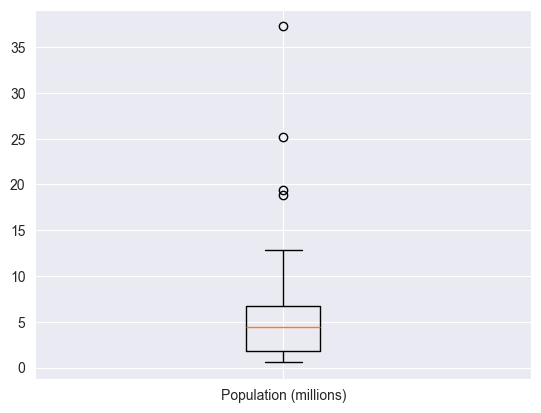

In [86]:
box = plt.boxplot(df["Population"]/1000000, labels=["Population (millions)"])

In [ ]:
binnedPopulation = pd.cut(df["Population"], 10)
binnedPopulation.value_counts()

In [ ]:
ax = (df["Population"]/1000000).plot.hist(figsize=(4,4), bins=10,density=True)
(df["Population"]/1000000).plot.density(ax=ax)
ax.set_xlabel("Population (millions)")

In [ ]:
ax = df["Murder.Rate"].plot.hist(figsize=(10, 5), density=True)
df["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (%)")

In [ ]:
dfw = pd.read_csv("data/dfw_airline.csv")
dfw

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

In [ ]:
sp500_px = pd.read_csv("data/sp500_data.csv.gz", index_col=0)
sp500_px

In [ ]:
sp500_sym = pd.read_csv("data/sp500_sectors.csv")
sp500_sym

In [ ]:
ax = sp500_sym.sector.value_counts().plot.bar()
ax.set_xlabel("Sector")
ax.set_ylabel("Count")

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym["sector"] == "etf"]["symbol"]]
etfs

In [ ]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))
etfs.corr()

In [ ]:
etfs.plot.scatter("SPY", "DIA", figsize=(4, 4))

In [ ]:
etfs.plot.scatter("XLI", "QQQ", figsize=(4, 4))

In [ ]:
sp500_sym

In [ ]:
telecomSymbols = sp500_sym[sp500_sym["sector"] == "telecommunications_services"]["symbol"]
telecomSymbols

In [ ]:
telecom = sp500_px.loc[sp500_px.index >= "2012-07-01", telecomSymbols]
telecom

In [ ]:
telecom.corr()

In [ ]:
ax = telecom.plot.scatter("T", "VZ", figsize=(4, 4), alpha=0.5)
ax.set_xlabel("AT&T")
ax.set_ylabel("Verizon")
ax.axhline(0, color="black", lw=1)
ax.axvline(0, color="black", lw=1)

In [98]:
kc_tax = pd.read_csv("data/kc_tax.csv.gz")
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [99]:
kc_tax0 = kc_tax[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500)]
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


<Axes: xlabel='SqFtTotLiving', ylabel='TaxAssessedValue'>

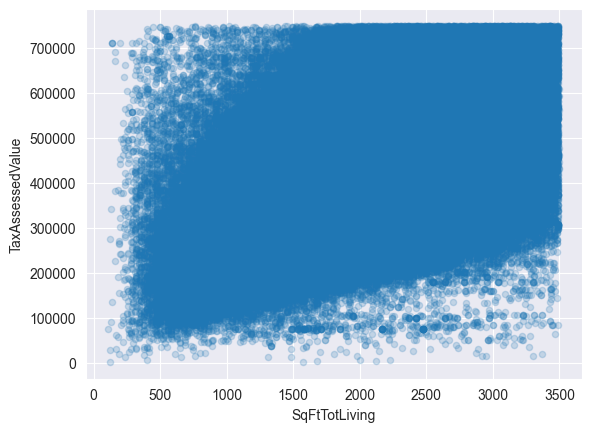

In [100]:
kc_tax0.plot.scatter("SqFtTotLiving", "TaxAssessedValue", alpha=0.2)

Text(0, 0.5, 'Tax-Assessed Value')

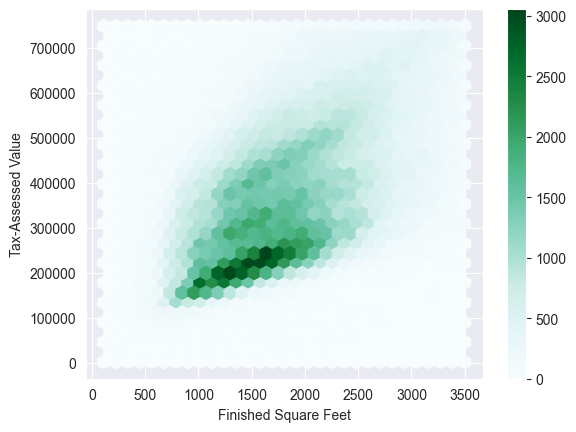

In [101]:
ax = kc_tax0.plot.hexbin("SqFtTotLiving", "TaxAssessedValue", gridsize=30, sharex=False)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

In [102]:
kc_tax0.corr()

,TaxAssessedValue,SqFtTotLiving,ZipCode
TaxAssessedValue,1.000000,0.531024,0.001593
SqFtTotLiving,0.531024,1.000000,0.002965
ZipCode,0.001593,0.002965,1.000000


In [103]:
ax = sns.kdeplot(data=kc_tax0, x="SqFtTotLiving", y="TaxAssessedValue", ax=ax)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

Text(24.0, 0.5, 'Tax-Assessed Value')

In [104]:
lc_loans = pd.read_csv("data/lc_loans.csv")
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [105]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [106]:
df = crosstab.loc["A":"G", :].copy()

def calculate(x):
    return x / x["All"]

perc_crosstab = df.apply(calculate, axis=1)
perc_crosstab["All"] = df[["All"]].apply(lambda x: x / np.sum(x))
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [107]:
merge_data = crosstab.merge(perc_crosstab, right_index=True, left_index=True, suffixes=("_Count", "_Percentage"))
cols = merge_data.columns.drop(["All_Count", "All_Percentage"]).sort_values().append(pd.Index(["All_Count", "All_Percentage"]))
merge_data = merge_data.reindex(cols, axis=1)
merge_data

,Charged Off_Count,Charged Off_Percentage,Current_Count,Current_Percentage,Fully Paid_Count,Fully Paid_Percentage,Late_Count,Late_Percentage,All_Count,All_Percentage
grade,,,,,,,,,,
A,1562,0.021548,50051,0.690454,20408,0.281528,469,0.006470,72490,0.160746
B,5302,0.040054,93852,0.709013,31160,0.235401,2056,0.015532,132370,0.293529
C,6023,0.049828,88928,0.735702,23147,0.191495,2777,0.022974,120875,0.268039
D,5007,0.067410,53281,0.717328,13681,0.184189,2308,0.031073,74277,0.164708
E,2842,0.081657,24639,0.707936,5949,0.170929,1374,0.039478,34804,0.077177
F,1526,0.118258,8444,0.654371,2328,0.180409,606,0.046962,12904,0.028614
G,409,0.126196,1990,0.614008,643,0.198396,199,0.061401,3241,0.007187


In [108]:
merge_data.columns = pd.MultiIndex.from_product([df.columns, ["Count", "Percentage"]])
# data = pd.DataFrame(merge_data.values, columns= pd.MultiIndex.from_product([df.columns, ["Count", "Percentage"]]), index=merge_data.index)
merge_data.stack()

status                      All  Charged Off       Current    Fully Paid  \
grade                                                                      
A     Count        72490.000000  1562.000000  50051.000000  20408.000000   
      Percentage       0.160746     0.021548      0.690454      0.281528   
B     Count       132370.000000  5302.000000  93852.000000  31160.000000   
      Percentage       0.293529     0.040054      0.709013      0.235401   
C     Count       120875.000000  6023.000000  88928.000000  23147.000000   
      Percentage       0.268039     0.049828      0.735702      0.191495   
D     Count        74277.000000  5007.000000  53281.000000  13681.000000   
      Percentage       0.164708     0.067410      0.717328      0.184189   
E     Count        34804.000000  2842.000000  24639.000000   5949.000000   
      Percentage       0.077177     0.081657      0.707936      0.170929   
F     Count        12904.000000  1526.000000   8444.000000   2328.000000   
      Percentage       0.028614     0.118258      0.654371      0.180409   
G     Count         3241.000000   409.000000   1990.000000    643.000000   
      Percentage       0.007187     0.126196      0.614008      0.198396   

status                   Late  
grade                          
A     Count        469.000000  
      Percentage     0.006470  
B     Count       2056.000000  
      Percentage     0.015532  
C     Count       2777.000000  
      Percentage     0.022974  
D     Count       2308.000000  
      Percentage     0.031073  
E     Count       1374.000000  
      Percentage     0.039478  
F     Count        606.000000  
      Percentage     0.046962  
G     Count        199.000000  
      Percentage     0.061401

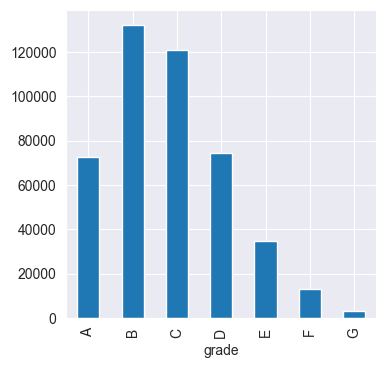

In [109]:
ax = merge_data["All"]["Count"].plot.bar(figsize=(4, 4))

In [110]:
airline_stats = pd.read_csv("data/airline_stats.csv")
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0.5, 0, 'Airline')

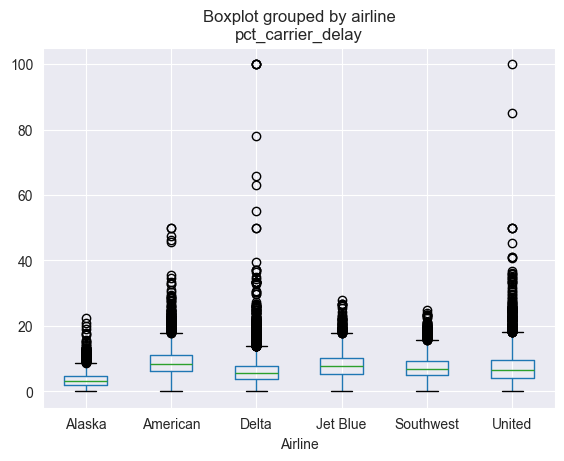

In [111]:
ax = airline_stats.boxplot(by="airline", column="pct_carrier_delay")
ax.set_xlabel("Airline")

In [ ]:
ax = sns.violinplot(data=airline_stats, x="airline", y="pct_carrier_delay", inner="quartile", color="white")
ax.set_xlabel("Daily % of Delayed Flights")

<Axes: title={'center': 'pct_atc_delay'}, xlabel='airline'>

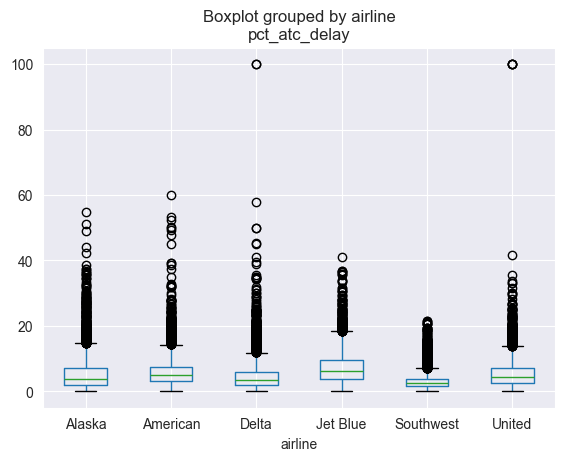

In [113]:
airline_stats.boxplot(by="airline", column="pct_atc_delay")

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

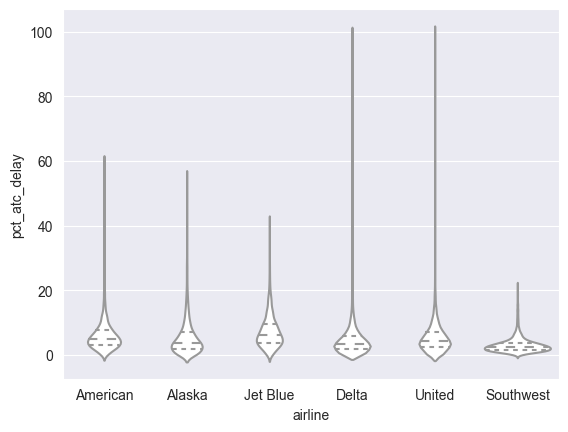

In [116]:
sns.violinplot(data=airline_stats, x="airline", y="pct_atc_delay", inner="quartile", color="white")

In [119]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


In [120]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)


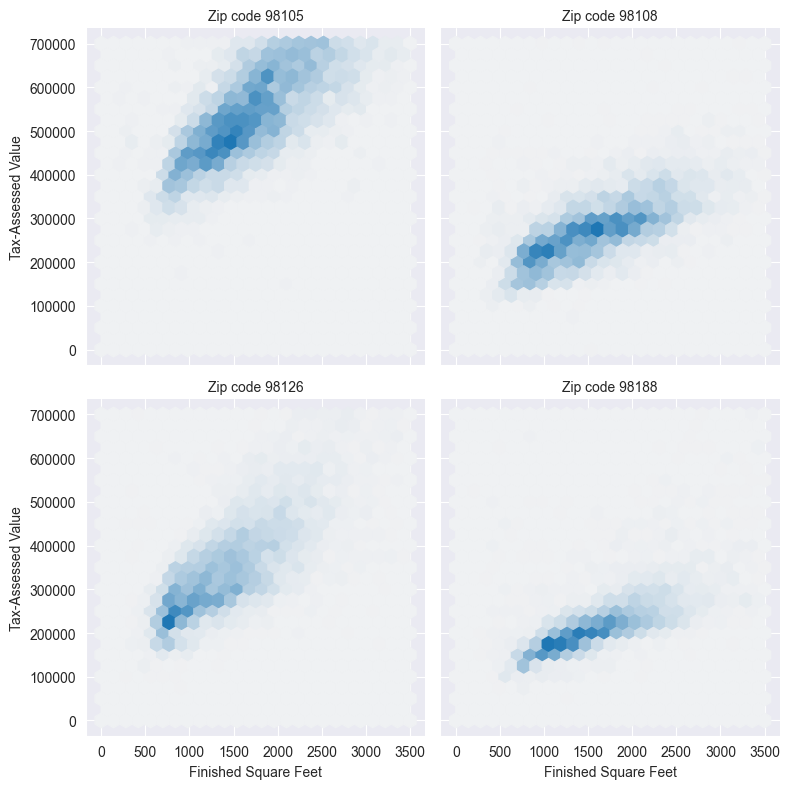

In [134]:
g = sns.FacetGrid(data=kc_tax_zip, col="ZipCode", col_wrap=2, height=4)
g.map(hexbin, "SqFtTotLiving", "TaxAssessedValue", extent=[0, 3500, 0, 700000])
g.set_axis_labels("Finished Square Feet", "Tax-Assessed Value")
g.set_titles("Zip code {col_name:.0f}")